# 서울시 구별 CCTV 현황 분석하기

* 서울시 각 구별 CCTV수를 파악하고, 인구대비 CCTV 비율을 파악해서 순위 비교
* 인구대비 CCTV의 평균치를 확인하고 그로부터 CCTV가 과하게 부족한 구를 확인
* Jupyter Notebook 사용환경을 익히고 Python 기본 문법을 확인
* Pandas와 Matplotlib의 기본적 사용법을 확인
* 단순한 그래프 표현에서 한 단계 더 나아가 경향을 확인하고 시각화하는 기초 

In [1]:
import pandas as pd

In [8]:
CCTV_Seoul = pd.read_csv('./01. CCTV_in_Seoul.csv', encoding='utf-8')
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [9]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [10]:
CCTV_Seoul.columns[0]

'기관명'

In [18]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]: '구별'}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


## 엑셀파일 읽기 - 서울시 인구현황

In [20]:
# !pip install xlrd

In [21]:
pop_Seoul = pd.read_excel('./01. population_in_Seoul.xls', encoding='utf-8')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [24]:
pop_Seoul = pd.read_excel('./01. population_in_Seoul.xls', 
                          header = 2,
                          parse_cols= 'B, D, G, J, N',
                          encoding='utf-8')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [25]:
pop_Seoul.rename(columns={pop_Seoul.columns[0]: '구별',
                          pop_Seoul.columns[1]: '인구수',
                          pop_Seoul.columns[2]: '한국인',
                          pop_Seoul.columns[3]: '외국인',
                          pop_Seoul.columns[4]: '고령자',
                         }, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


## Pandas 기초

In [26]:
import pandas as pd
import numpy as np

In [27]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [28]:
dates = pd.date_range('20180313', periods=6)
dates

DatetimeIndex(['2018-03-13', '2018-03-14', '2018-03-15', '2018-03-16',
               '2018-03-17', '2018-03-18'],
              dtype='datetime64[ns]', freq='D')

In [29]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
2018-03-13,-0.078692,-0.676119,0.416577,0.105109
2018-03-14,-0.340023,1.617856,-0.119864,-0.317486
2018-03-15,0.948521,-1.457924,-0.037492,-1.044061
2018-03-16,-0.316616,-2.222921,-1.934844,-1.363792
2018-03-17,1.445075,1.756007,-1.762844,0.649693
2018-03-18,0.025621,0.645055,0.284635,1.946573


In [30]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [31]:
df.index

DatetimeIndex(['2018-03-13', '2018-03-14', '2018-03-15', '2018-03-16',
               '2018-03-17', '2018-03-18'],
              dtype='datetime64[ns]', freq='D')

In [32]:
df.values

array([[-0.07869166, -0.67611907,  0.41657683,  0.10510901],
       [-0.3400227 ,  1.61785557, -0.11986368, -0.31748624],
       [ 0.94852137, -1.45792378, -0.03749189, -1.04406066],
       [-0.31661575, -2.22292105, -1.93484383, -1.36379229],
       [ 1.44507549,  1.75600713, -1.76284367,  0.64969261],
       [ 0.02562148,  0.6450553 ,  0.28463512,  1.94657282]])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2018-03-13 to 2018-03-18
Freq: D
Data columns (total 4 columns):
A    6 non-null float64
B    6 non-null float64
C    6 non-null float64
D    6 non-null float64
dtypes: float64(4)
memory usage: 400.0 bytes


In [34]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.280648,-0.056341,-0.525639,-0.003994
std,0.740009,1.650583,1.045351,1.206067
min,-0.340023,-2.222921,-1.934844,-1.363792
25%,-0.257135,-1.262473,-1.352099,-0.862417
50%,-0.026535,-0.015532,-0.078678,-0.106189
75%,0.717796,1.374655,0.204103,0.513547
max,1.445075,1.756007,0.416577,1.946573


In [36]:
df.sort_values(by='B', ascending=False)

,A,B,C,D
2018-03-17,1.445075,1.756007,-1.762844,0.649693
2018-03-14,-0.340023,1.617856,-0.119864,-0.317486
2018-03-18,0.025621,0.645055,0.284635,1.946573
2018-03-13,-0.078692,-0.676119,0.416577,0.105109
2018-03-15,0.948521,-1.457924,-0.037492,-1.044061
2018-03-16,-0.316616,-2.222921,-1.934844,-1.363792


In [37]:
df

,A,B,C,D
2018-03-13,-0.078692,-0.676119,0.416577,0.105109
2018-03-14,-0.340023,1.617856,-0.119864,-0.317486
2018-03-15,0.948521,-1.457924,-0.037492,-1.044061
2018-03-16,-0.316616,-2.222921,-1.934844,-1.363792
2018-03-17,1.445075,1.756007,-1.762844,0.649693
2018-03-18,0.025621,0.645055,0.284635,1.946573


In [38]:
df['A']

2018-03-13   -0.078692
2018-03-14   -0.340023
2018-03-15    0.948521
2018-03-16   -0.316616
2018-03-17    1.445075
2018-03-18    0.025621
Freq: D, Name: A, dtype: float64

In [41]:
df[0:3]

,A,B,C,D
2018-03-13,-0.078692,-0.676119,0.416577,0.105109
2018-03-14,-0.340023,1.617856,-0.119864,-0.317486
2018-03-15,0.948521,-1.457924,-0.037492,-1.044061


In [42]:
df['2018-03-14':'2018-03-16']

,A,B,C,D
2018-03-14,-0.340023,1.617856,-0.119864,-0.317486
2018-03-15,0.948521,-1.457924,-0.037492,-1.044061
2018-03-16,-0.316616,-2.222921,-1.934844,-1.363792


In [47]:
df.loc[dates[0]]

A   -0.078692
B   -0.676119
C    0.416577
D    0.105109
Name: 2018-03-13 00:00:00, dtype: float64

In [48]:
df.loc[:, ['A', 'B']]

,A,B
2018-03-13,-0.078692,-0.676119
2018-03-14,-0.340023,1.617856
2018-03-15,0.948521,-1.457924
2018-03-16,-0.316616,-2.222921
2018-03-17,1.445075,1.756007
2018-03-18,0.025621,0.645055


In [49]:
df.iloc[3]

A   -0.316616
B   -2.222921
C   -1.934844
D   -1.363792
Name: 2018-03-16 00:00:00, dtype: float64

In [50]:
df.iloc[3:5, 0:2]

,A,B
2018-03-16,-0.316616,-2.222921
2018-03-17,1.445075,1.756007


In [53]:
df.iloc[[1, 4], [0, 3]]

,A,D
2018-03-14,-0.340023,-0.317486
2018-03-17,1.445075,0.649693


In [55]:
df.iloc[1:3, :]

,A,B,C,D
2018-03-14,-0.340023,1.617856,-0.119864,-0.317486
2018-03-15,0.948521,-1.457924,-0.037492,-1.044061


In [56]:
df.iloc[:, 1:3]

,B,C
2018-03-13,-0.676119,0.416577
2018-03-14,1.617856,-0.119864
2018-03-15,-1.457924,-0.037492
2018-03-16,-2.222921,-1.934844
2018-03-17,1.756007,-1.762844
2018-03-18,0.645055,0.284635


In [58]:
df[df.A > 0]

,A,B,C,D
2018-03-15,0.948521,-1.457924,-0.037492,-1.044061
2018-03-17,1.445075,1.756007,-1.762844,0.649693
2018-03-18,0.025621,0.645055,0.284635,1.946573


In [59]:
df[df > 0]

,A,B,C,D
2018-03-13,NaN,NaN,0.416577,0.105109
2018-03-14,NaN,1.617856,NaN,NaN
2018-03-15,0.948521,NaN,NaN,NaN
2018-03-16,NaN,NaN,NaN,NaN
2018-03-17,1.445075,1.756007,NaN,0.649693
2018-03-18,0.025621,0.645055,0.284635,1.946573


In [60]:
df2 = df.copy()

In [61]:
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2018-03-13,-0.078692,-0.676119,0.416577,0.105109,one
2018-03-14,-0.340023,1.617856,-0.119864,-0.317486,one
2018-03-15,0.948521,-1.457924,-0.037492,-1.044061,two
2018-03-16,-0.316616,-2.222921,-1.934844,-1.363792,three
2018-03-17,1.445075,1.756007,-1.762844,0.649693,four
2018-03-18,0.025621,0.645055,0.284635,1.946573,three


In [62]:
df2['E'].isin(['two', 'four'])

2018-03-13    False
2018-03-14    False
2018-03-15     True
2018-03-16    False
2018-03-17     True
2018-03-18    False
Freq: D, Name: E, dtype: bool

In [64]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2018-03-15,0.948521,-1.457924,-0.037492,-1.044061,two
2018-03-17,1.445075,1.756007,-1.762844,0.649693,four


In [66]:
np.cumsum([1, 2, 3])

array([1, 3, 6])

In [68]:
df

,A,B,C,D
2018-03-13,-0.078692,-0.676119,0.416577,0.105109
2018-03-14,-0.340023,1.617856,-0.119864,-0.317486
2018-03-15,0.948521,-1.457924,-0.037492,-1.044061
2018-03-16,-0.316616,-2.222921,-1.934844,-1.363792
2018-03-17,1.445075,1.756007,-1.762844,0.649693
2018-03-18,0.025621,0.645055,0.284635,1.946573


In [67]:
df.apply(np.cumsum)

,A,B,C,D
2018-03-13,-0.078692,-0.676119,0.416577,0.105109
2018-03-14,-0.418714,0.941736,0.296713,-0.212377
2018-03-15,0.529807,-0.516187,0.259221,-1.256438
2018-03-16,0.213191,-2.739108,-1.675623,-2.620230
2018-03-17,1.658267,-0.983101,-3.438466,-1.970538
2018-03-18,1.683888,-0.338046,-3.153831,-0.023965


In [69]:
df.apply(lambda x: x.max() - x.min())

A    1.785098
B    3.978928
C    2.351421
D    3.310365
dtype: float64

## CCTV 데이터 파악하기

In [76]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [77]:
CCTV_Seoul.sort_values(by='소계', ascending=True).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [78]:
CCTV_Seoul.sort_values(by='소계', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [79]:
CCTV_Seoul['최근증가율'] = ((CCTV_Seoul['2014년'] + CCTV_Seoul['2015년'] + \
                        CCTV_Seoul['2016년']) / CCTV_Seoul['2013년도 이전']) * 100

CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


## 서울시 인구 데이터 파악하기

In [80]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [81]:
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [83]:
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan], dtype=object)

In [85]:
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [86]:
pop_Seoul.drop([26], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [87]:
pop_Seoul['외국인비율'] = ( pop_Seoul['외국인'] / pop_Seoul['인구수'] ) * 100
pop_Seoul['고령자비율'] = ( pop_Seoul['고령자'] / pop_Seoul['인구수'] ) * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [88]:
pop_Seoul.sort_values(by='인구수', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [89]:
pop_Seoul.sort_values(by='외국인', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [90]:
pop_Seoul.sort_values(by='외국인비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [91]:
pop_Seoul.sort_values(by='고령자', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [92]:
pop_Seoul.sort_values(by='고령자비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


## 두 DataFrame 병합하기

In [93]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

In [94]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [95]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [96]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [97]:
result = pd.concat([df1, df2, df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [98]:
result = pd.concat([df1, df2, df3], keys=['x', 'y', 'z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [99]:
result.index

MultiIndex(levels=[['x', 'y', 'z'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]])

In [100]:
result.index.get_level_values(0)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [101]:
result.index.get_level_values(1)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [103]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'], 
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

In [106]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [107]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [105]:
result = pd.concat([df1, df4], axis=1)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [108]:
result = pd.concat([df1, df4], axis=1, join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [110]:
result = pd.concat([df1, df4], axis=1, join_axes=[df1.index])
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [112]:
result = pd.concat([df1, df4], ignore_index=True)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [117]:
left = pd.DataFrame({'key': ['K0', 'K4', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [118]:
left

,A,B,key
0,A0,B0,K0
1,A1,B1,K4
2,A2,B2,K2
3,A3,B3,K3


In [119]:
right

,C,D,key
0,C0,D0,K0
1,C1,D1,K1
2,C2,D2,K2
3,C3,D3,K3


In [120]:
pd.merge(left, right, on='key')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A2,B2,K2,C2,D2
2,A3,B3,K3,C3,D3


In [121]:
pd.merge(left, right, how='left' ,on='key')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K4,NaN,NaN
2,A2,B2,K2,C2,D2
3,A3,B3,K3,C3,D3


In [122]:
pd.merge(left, right, how='right' ,on='key')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A2,B2,K2,C2,D2
2,A3,B3,K3,C3,D3
3,NaN,NaN,K1,C1,D1


In [123]:
pd.merge(left, right, how='outer' ,on='key')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K4,NaN,NaN
2,A2,B2,K2,C2,D2
3,A3,B3,K3,C3,D3
4,NaN,NaN,K1,C1,D1


In [124]:
pd.merge(left, right, how='inner' ,on='key')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A2,B2,K2,C2,D2
2,A3,B3,K3,C3,D3


## CCTV 데이터와 인구 데이터 합치고 분석하기

In [127]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [130]:
# del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']

In [131]:
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [132]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [133]:
np.corrcoef(data_result["고령자비율"], data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [134]:
np.corrcoef(data_result["외국인비율"], data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [135]:
np.corrcoef(data_result["인구수"], data_result['소계'])

array([[ 1.        ,  0.30634228],
       [ 0.30634228,  1.        ]])

In [136]:
data_result.sort_values(by='소계', ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [137]:
data_result.sort_values(by='인구수', ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


## 그래프 그리기 기초 - matplotlib

In [138]:
import matplotlib.pyplot as plt
%matplotlib inline

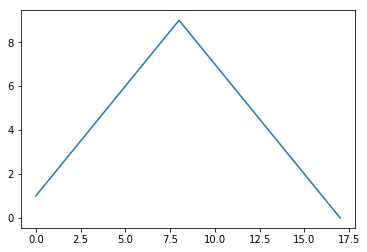

In [139]:
plt.figure()
plt.plot([1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0])
plt.show()

In [145]:
import numpy as np

t = np.arange(0, 12, 0.01)

y = np.sin(t)

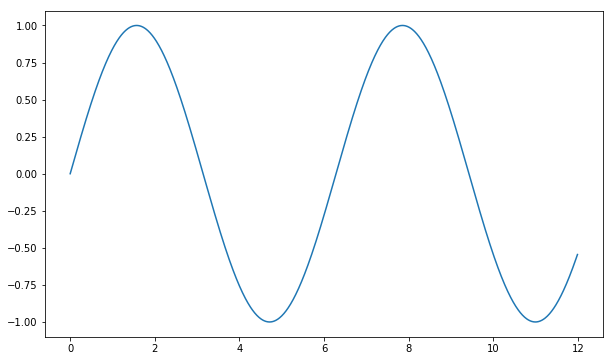

In [146]:
plt.figure(figsize=(10, 6))
plt.plot(t, y)
plt.show()

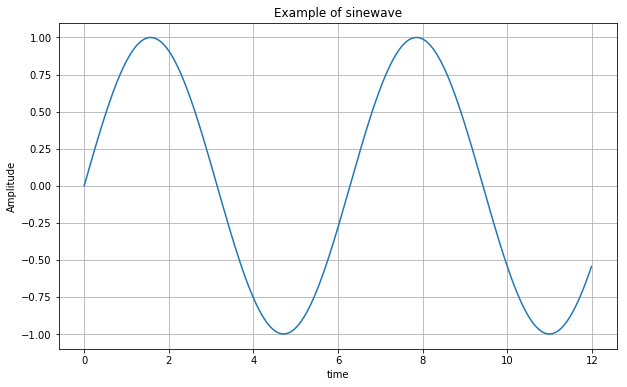

In [147]:
plt.figure(figsize=(10, 6))
plt.plot(t, y)
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

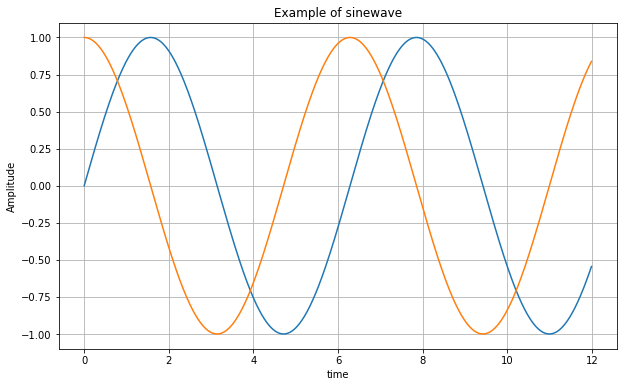

In [148]:
plt.figure(figsize=(10, 6))
plt.plot(t, np.sin(t))
plt.plot(t, np.cos(t))
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

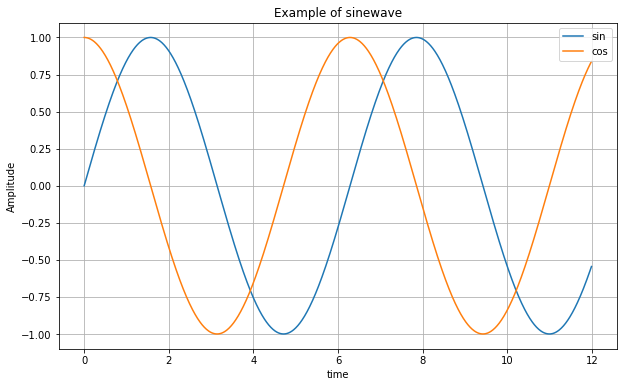

In [149]:
plt.figure(figsize=(10, 6))
plt.plot(t, np.sin(t), label='sin')
plt.plot(t, np.cos(t), label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

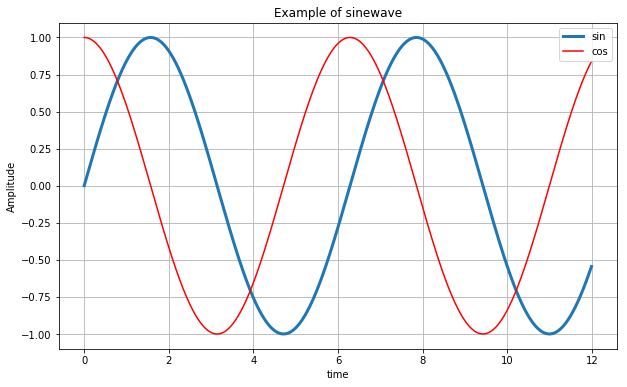

In [150]:
plt.figure(figsize=(10, 6))
plt.plot(t, np.sin(t), lw=3, label='sin')
plt.plot(t, np.cos(t), 'r', label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

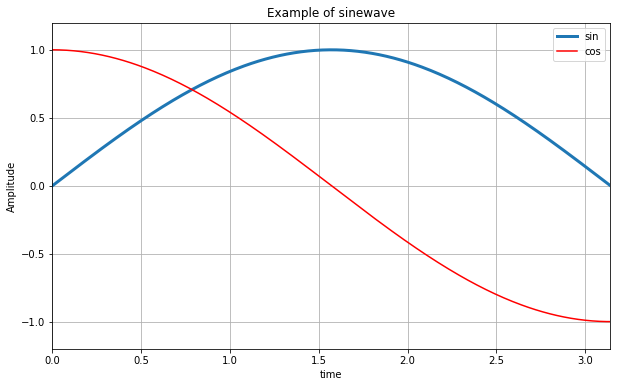

In [151]:
plt.figure(figsize=(10, 6))
plt.plot(t, np.sin(t), lw=3, label='sin')
plt.plot(t, np.cos(t), 'r', label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.ylim(-1.2, 1.2)
plt.xlim(0, np.pi)
plt.show()

## CCTV와 인구현황 그래프로 분석하기

In [152]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [155]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


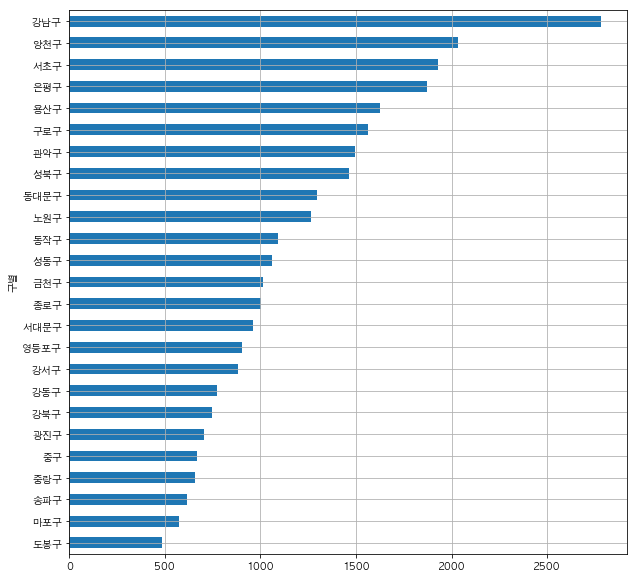

In [157]:
plt.figure()
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10, 10))
plt.show()

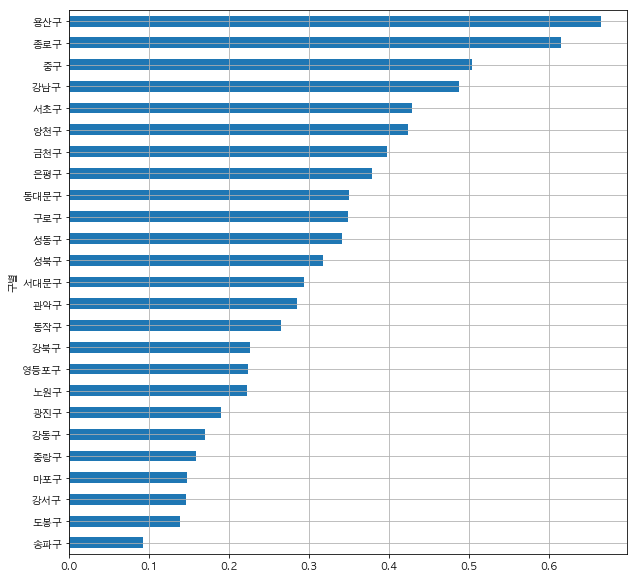

In [158]:
data_result['CCTV비율'] = (data_result['소계'] / data_result['인구수']) * 100
data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10, 10))
plt.show()

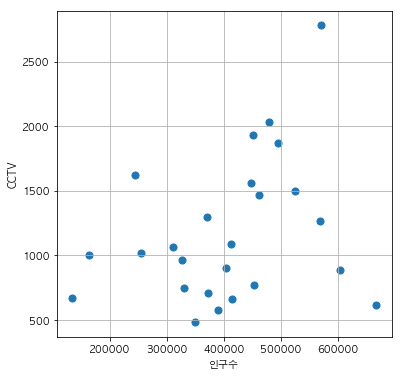

In [159]:
plt.figure(figsize=(6, 6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [163]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([  1.30916415e-03,   6.45066497e+02])

In [164]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

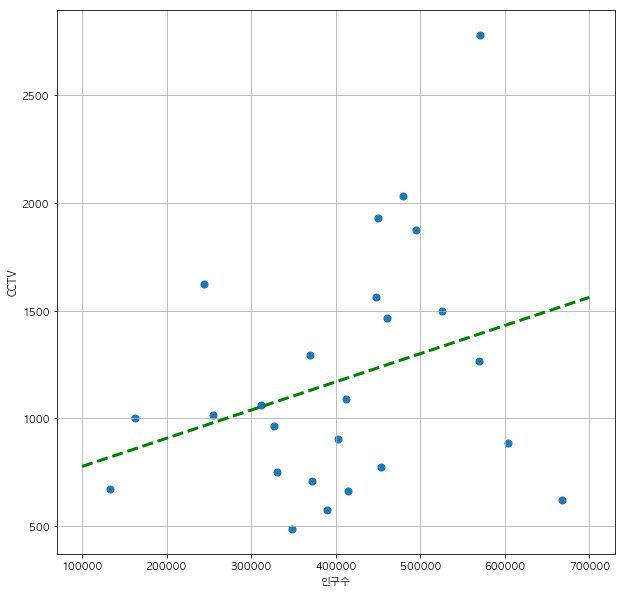

In [165]:
plt.figure(figsize=(10, 10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

## 조금 더 설득력 있는 자료 만들기

In [171]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


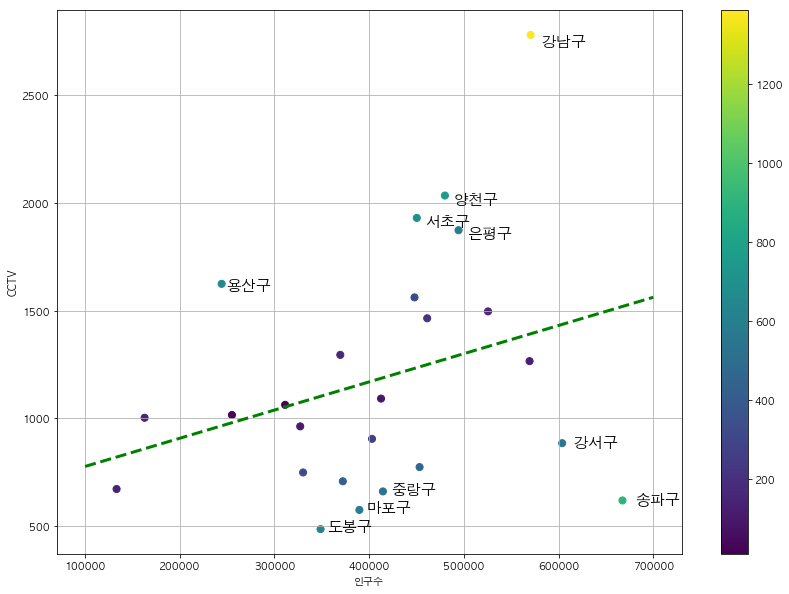

In [172]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'], 
            c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, 
             df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.colorbar()
plt.grid()
plt.show()